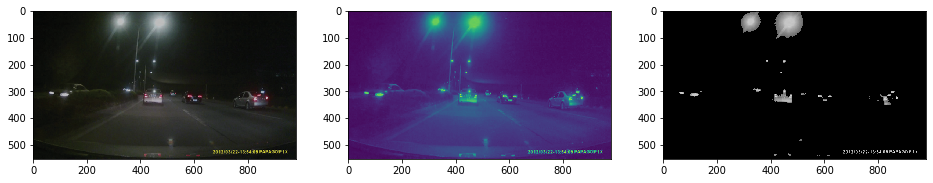

In [10]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
import sys
#img = mpimg.imread('image/0_BI1IAmhZxzc0H5u8_.png',0)
img = cv2.imread('image/haha.png',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img)

max_img = np.max(a=img, axis=2)
img_c = max_img / 255.0
plt.subplot(132)
plt.imshow(img_c)
ret , img_threshold = cv2.threshold(img_c, 0.4, 1, cv2.THRESH_TOZERO)
plt.subplot(133)
plt.imshow(img_threshold, cmap='gray')

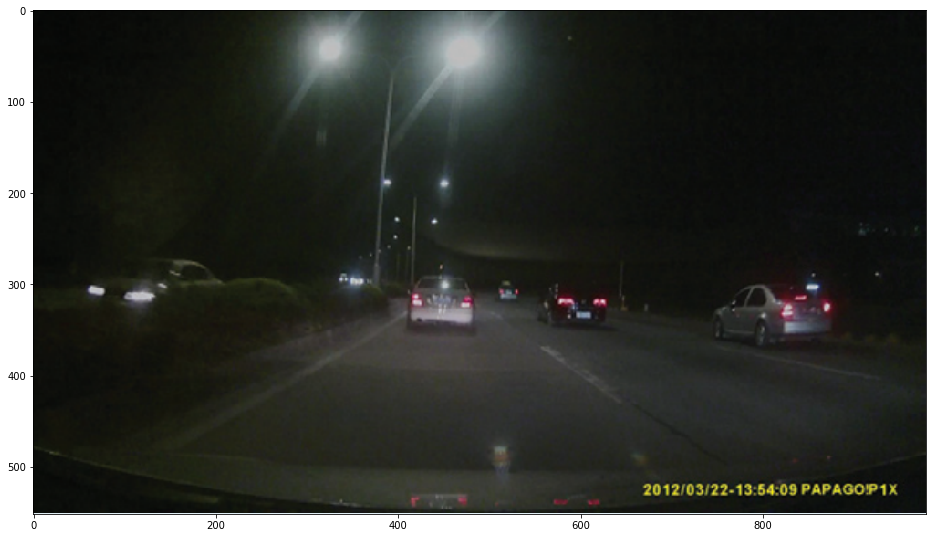

In [11]:
plt.figure(figsize=(16,16))
plt.imshow(img)

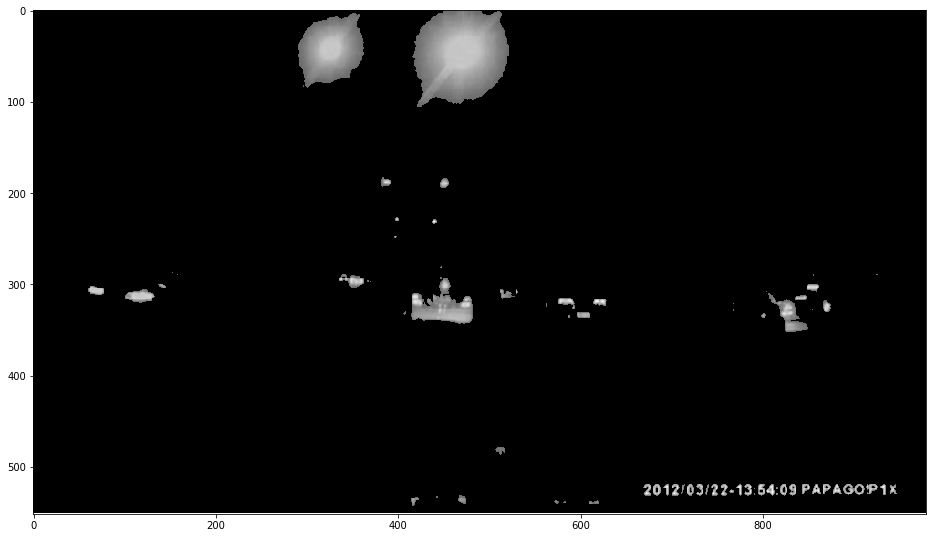

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(img_threshold,cmap='gray')

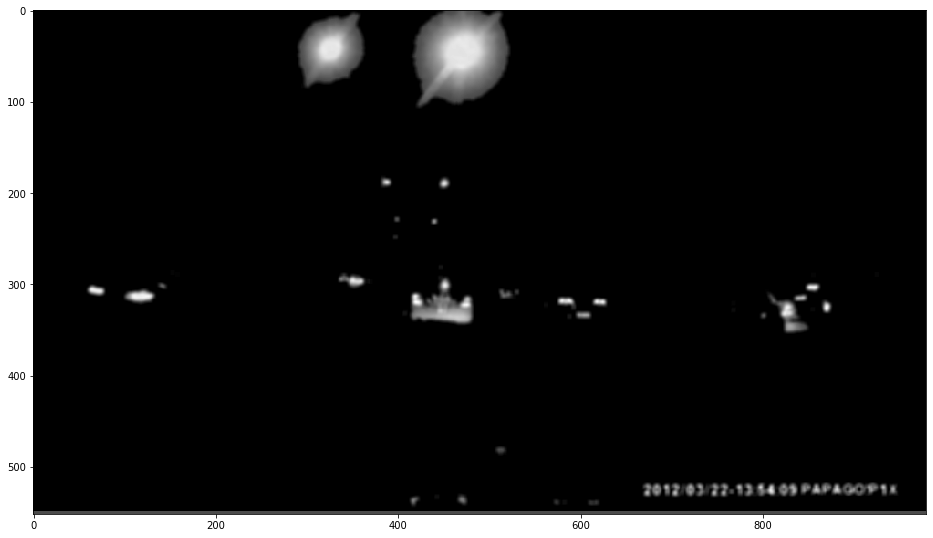

In [16]:
img_r2=img_threshold**2
kernel = np.ones((5,5),np.float32)/25
omega = cv2.filter2D(img_r2,-1,kernel)
omega2 = omega**2

plt.figure(figsize=(16,16))
plt.imshow(omega, cmap='gray')

In [17]:
img_process = (img_r2-omega)**2
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img_process,-1,kernel)

In [15]:
#plt.figure(figsize=(16,16))
#plt.imshow(dst, cmap='gray')

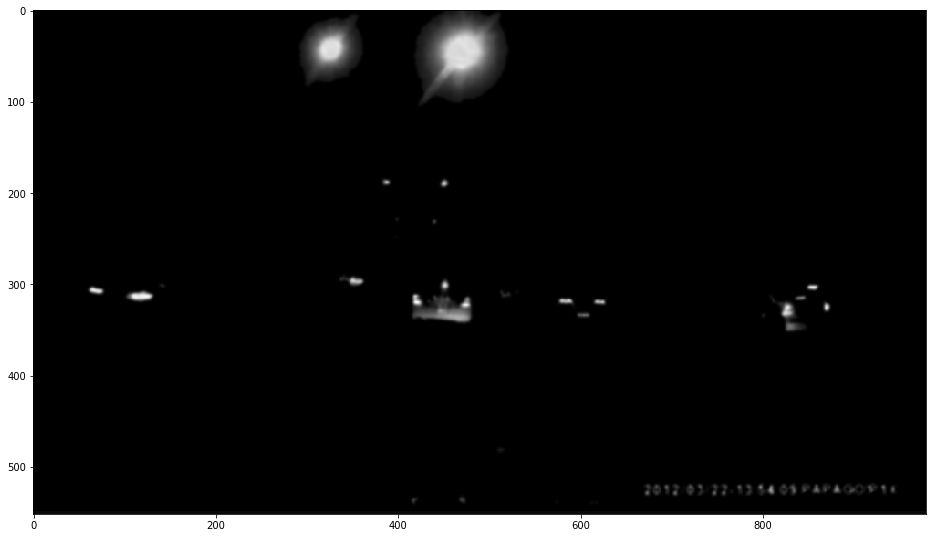

In [18]:
height, width = img_threshold.shape
m=np.copy(img_threshold)
for y in range(0, height):
    for x in range(0, width):
        m[y,x]= omega2[y,x] / (dst[y,x]+0.1)
plt.figure(figsize=(16,16))
plt.imshow(m, cmap='gray')

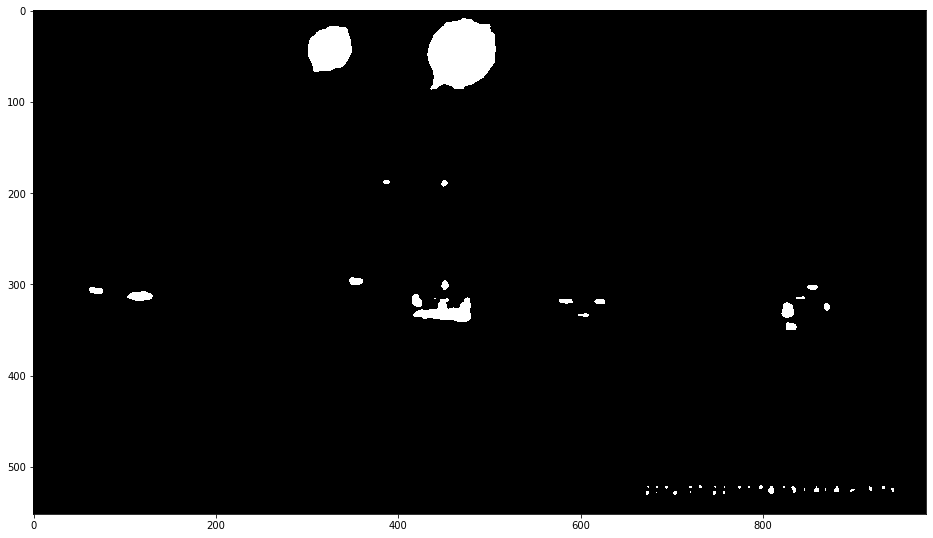

In [31]:
ret, m_th = cv2.threshold(m, 0.8, 1, cv2.THRESH_BINARY)
plt.figure(figsize=(16,16))
plt.imshow(m_th, cmap='gray')

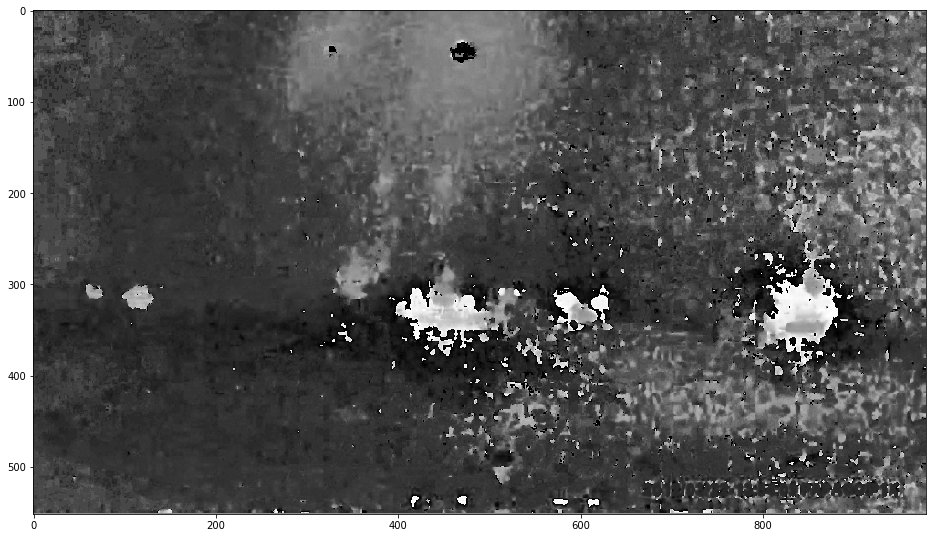

In [34]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(16,16))
plt.imshow(img_hsv[:,:,0], cmap='gray')


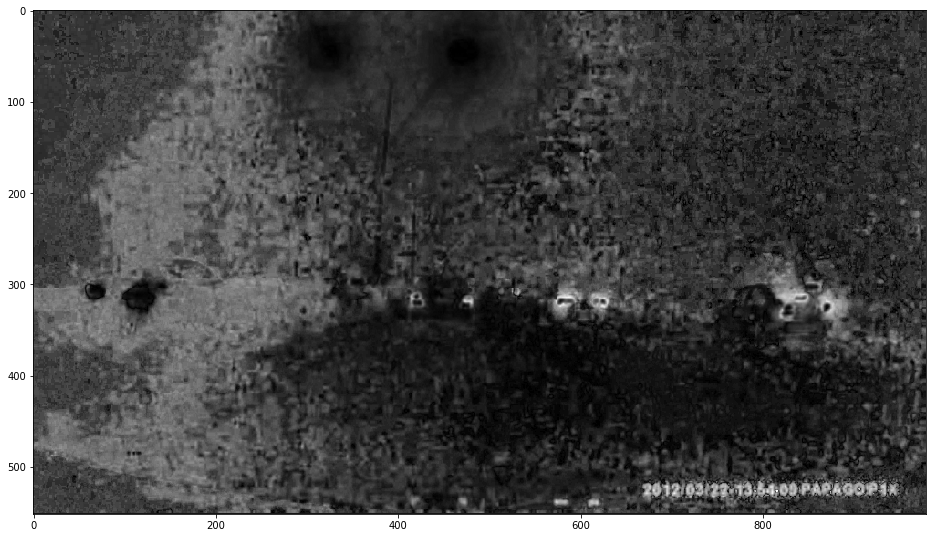

In [24]:
plt.figure(figsize=(16,16))

plt.imshow(img_hsv[:,:,1], cmap='gray')

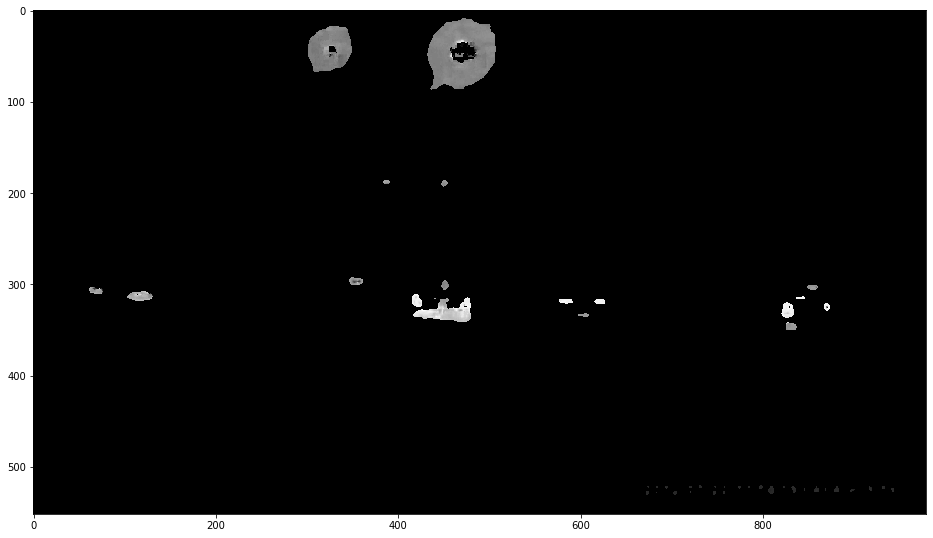

In [25]:
plt.figure(figsize=(16,16))
img_mul = img_hsv[:,:,0]*m_th
plt.imshow(img_mul, cmap='gray')


# tail light

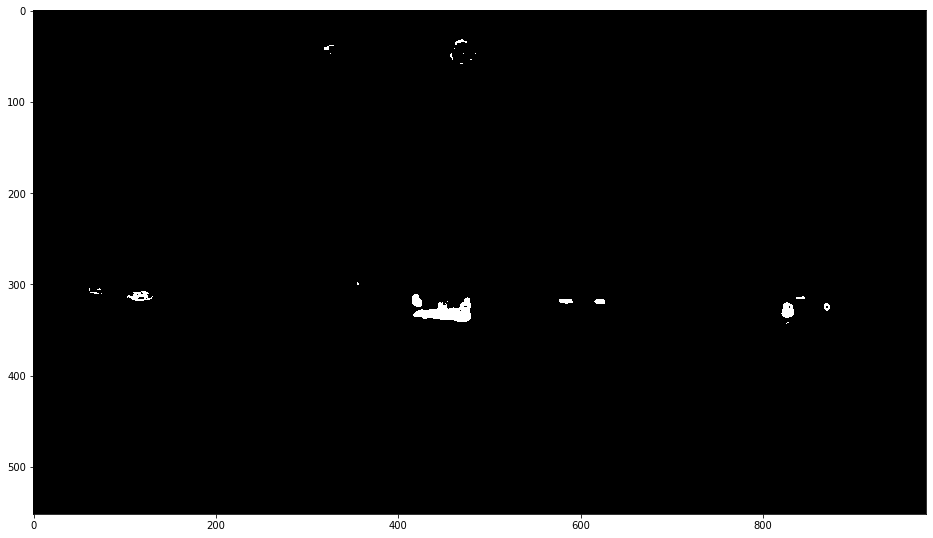

In [39]:
ret, img_mul_th = cv2.threshold(img_mul, 117, 1, cv2.THRESH_BINARY)
plt.figure(figsize=(16,16))
plt.imshow(img_mul_th, cmap='gray')

//miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5062: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


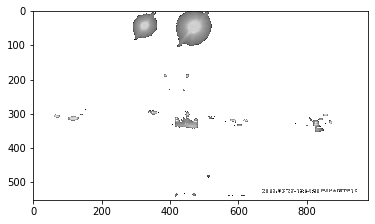

In [21]:
from scipy.stats import nakagami
img_nakagami = np.copy(img_threshold)
for y in range(0, height):
    for x in range(0, width):
            img_nakagami[y,x]=nakagami.pdf(img_nakagami[y,x], m[y,x])
plt.imshow(img_nakagami, cmap='gray')

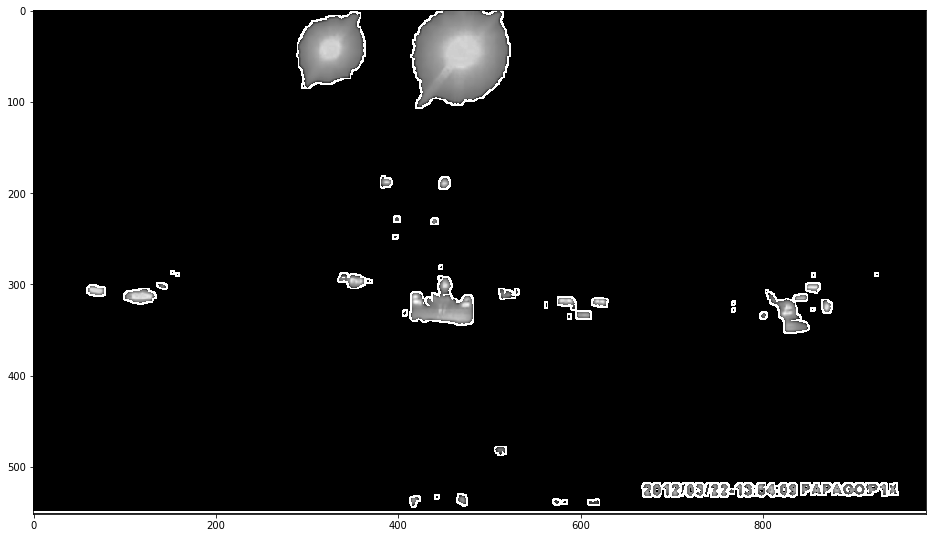

In [13]:
plt.figure(figsize=(16,16))
img_nakagami[np.isnan(img_nakagami)] = 0
plt.imshow(img_nakagami, cmap='gray')

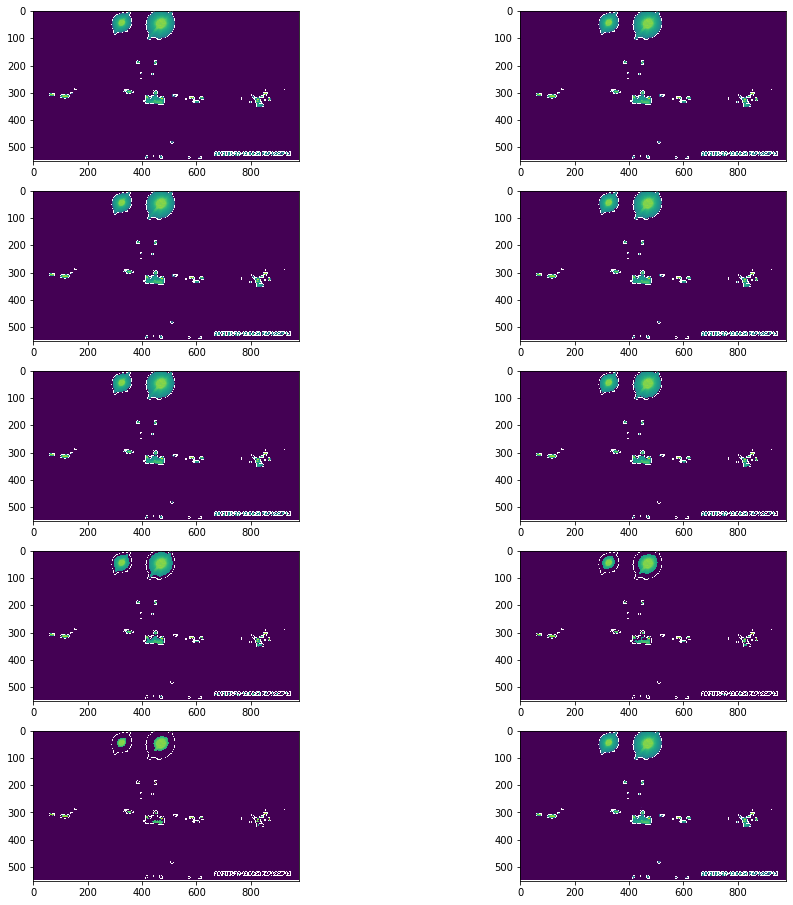

In [14]:
plt.figure(figsize=(16,16))
for i in range(10):
    ret, img_threshold2 = cv2.threshold(img_nakagami, i/10.0, 1, cv2.THRESH_TOZERO)
    plt.subplot(str(52)+str(i))
    plt.imshow(img_threshold2)

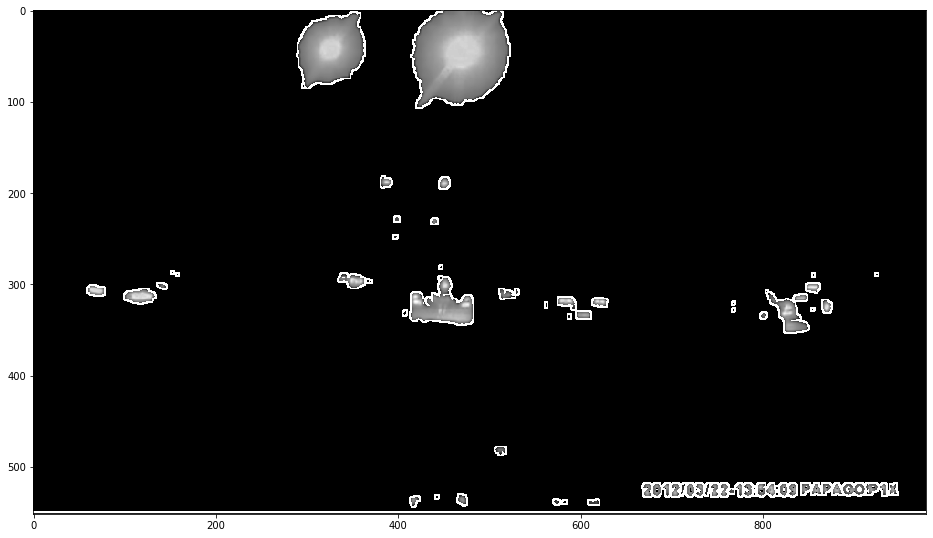

In [15]:
plt.figure(figsize=(16,16))
ret, img_threshold3 = cv2.threshold(img_nakagami, 0.1, 1, cv2.THRESH_TOZERO)
plt.imshow(img_threshold3, cmap='gray')

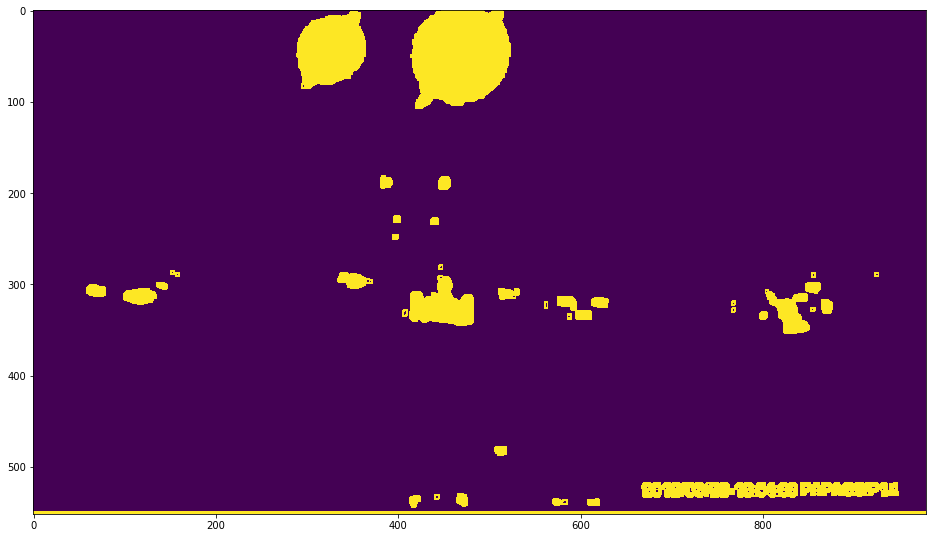

In [16]:
plt.figure(figsize=(16,16))
ret, img_threshold4 = cv2.threshold(img_nakagami, 0.1, 1, cv2.THRESH_BINARY)
plt.imshow(img_threshold4)